# [第3章: 正規表現](http://www.cl.ecei.tohoku.ac.jp/nlp100/#ch3)
Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/jawiki-country.json.gz)がある．
* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに，記事本文が"text"キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される
以下の処理を行うプログラムを作成せよ．

In [1]:
!ls Input/jawiki-country.json.gz

Input/jawiki-country.json.gz


## 20. JSONデータの読み込み
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [2]:
import gzip
import json

In [3]:
uk_lines = None

with gzip.open("Input/jawiki-country.json.gz", mode="rt") as countries_json:
    for country_json in countries_json:
        country = json.loads(country_json)
        if country["title"] == "イギリス":
            uk_lines = country["text"].split("\n")
            break

In [4]:
#uk_lines
uk_lines[:10]

['{{redirect|UK}}',
 '{{基礎情報 国',
 '|略名 = イギリス',
 '|日本語国名 = グレートブリテン及び北アイルランド連合王国',
 '|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>',
 '*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）<br/>',
 '*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）<br/>',
 '*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）<br/>',
 '*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）<br/>',
 '*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）<br/>']

## 21. カテゴリ名を含む行を抽出
記事中でカテゴリ名を宣言している行を抽出せよ．

In [5]:
uk_category_lines = []

for uk_line in uk_lines:
    if "Category" in uk_line:
        uk_category_lines.append(uk_line)

In [6]:
uk_category_lines

['[[Category:イギリス|*]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国]]',
 '[[Category:海洋国家]]',
 '[[Category:君主国]]',
 '[[Category:島国|くれいとふりてん]]',
 '[[Category:1801年に設立された州・地域]]']

## 22. カテゴリ名の抽出
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [7]:
import re

In [8]:
uk_categories = []

for uk_category_line in uk_category_lines:
    match = re.search(r"\[\[Category:(.*)\]\]", uk_category_line)
    uk_categories.append(re.sub(r"\|.*", "", match.group(1)))

In [9]:
uk_categories

['イギリス', '英連邦王国', 'G8加盟国', '欧州連合加盟国', '海洋国家', '君主国', '島国', '1801年に設立された州・地域']

## 23. セクション構造
記事中に含まれるセクション名とそのレベル（例えば"== セクション名 =="なら1）を表示せよ．

In [10]:
def _det_section_level(foo: str, bar: int):
    match = re.search("=(.*)=", foo)
    if match is None:
        return foo, bar
    else:
        return _det_section_level(match.group(1), bar+1)

In [11]:
uk_sections = {}

for uk_line in uk_lines:
    match = re.search("==(.*)==", uk_line)
    if match is not None:
        section, level = _det_section_level(match.group(1), 1)
        uk_sections[section] = level

In [12]:
uk_sections

{'国名': 1,
 '歴史': 1,
 '地理': 1,
 '気候': 2,
 '政治': 1,
 '外交と軍事': 1,
 '地方行政区分': 1,
 '主要都市': 2,
 '科学技術': 1,
 '経済': 1,
 '鉱業': 2,
 '農業': 2,
 '貿易': 2,
 '通貨': 2,
 '企業': 2,
 '交通': 1,
 '道路': 2,
 '鉄道': 2,
 '海運': 2,
 '航空': 2,
 '通信': 1,
 '国民': 1,
 '言語': 2,
 '宗教': 2,
 ' 婚姻 ': 2,
 '教育': 2,
 '文化': 1,
 '食文化': 2,
 '文学': 2,
 ' 哲学 ': 2,
 '音楽': 2,
 'イギリスのポピュラー音楽': 3,
 '映画': 2,
 'コメディ': 2,
 '国花': 2,
 '世界遺産': 2,
 '祝祭日': 2,
 'スポーツ': 1,
 'サッカー': 2,
 '競馬': 2,
 'モータースポーツ': 2,
 '脚注': 1,
 '関連項目': 1,
 '外部リンク': 1}

## 24. ファイル参照の抽出
記事から参照されているメディアファイルをすべて抜き出せ．

In [13]:
for uk_line in uk_lines:
    match = re.search(r"\[\[File:(.*)\|thumb\|.*", uk_line)
    if match is not None:
        print(match.group(1))

Battle of Waterloo 1815.PNG
The British Empire.png
Uk topo en.jpg
BenNevis2005.jpg
Elizabeth II greets NASA GSFC employees, May 8, 2007 edit.jpg
Palace of Westminster, London - Feb 2007.jpg
David Cameron and Barack Obama at the G20 Summit in Toronto.jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
Scotland Parliament Holyrood.jpg
London.bankofengland.arp.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow T5.jpg
Anglospeak.svg


## 25. テンプレートの抽出
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [14]:
uk_basic_infos_25 = {}

foo = False
key = None
for uk_line in uk_lines:
    if uk_line == "{{基礎情報 国":
        # Start
        foo = True
        continue
    elif foo == False:
        continue
    elif uk_line == "}}":
        # Finish
        break

    if uk_line[0] == "|":
        key, value = re.search(r"\|(.*) = (.*)", uk_line).group(1, 2)
        uk_basic_infos_25[key] = value
    else:
        uk_basic_infos_25[key] += uk_line

In [15]:
uk_basic_infos_25

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）<br/>*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）<br/>*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）<br/>*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）<br/>*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）<br/>**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br/>（[[フランス語]]:神と私の権利）',
 '国歌': '[[女王陛下万歳|神よ女王陛下を守り給え]]',
 '位置画像': 'Location_

## 26. 強調マークアップの除去
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: [マークアップ早見表](http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8)）．

In [16]:
uk_basic_infos_26 = {}

for key, value in uk_basic_infos_25.items():
    tmp = value
    tmp = re.sub(r"'''''(.*?)'''''", r"\1", tmp)
    tmp = re.sub(r"'''(.*?)'''", r"\1", tmp)
    tmp = re.sub(r"''(.*?)''", r"\1", tmp)
    uk_basic_infos_26[key] = tmp

In [17]:
uk_basic_infos_26

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）<br/>*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）<br/>*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）<br/>*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）<br/>*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）<br/>**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br/>（[[フランス語]]:神と私の権利）',
 '国歌': '[[女王陛下万歳|神よ女王陛下を守り給え]]',
 '位置画像': 'Location_

## 27. 内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: [マークアップ早見表](http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8)）．

In [18]:
uk_basic_infos_27 = {}

for key, value in uk_basic_infos_26.items():
    tmp = value
    tmp = re.sub(r"\[\[ファイル:([^\]]*?)\|([^\]]*?)\|([^\]]*?)\]\]", r"\3", tmp)
    tmp = re.sub(r"\[\[([^\]]*?)#([^\]]*?)\|([^\]]*?)\]\]", r"\3", tmp)
    tmp = re.sub(r"\[\[([^\]]*?)\|([^\]]*?)\]\]", r"\2", tmp)
    tmp = re.sub(r"\[\[(.*?)\]\]", r"\1", tmp)
    uk_basic_infos_27[key] = tmp

In [19]:
uk_basic_infos_27

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）<br/>*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）<br/>*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）<br/>*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）<br/>*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）<br/>**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br/>（フランス語:神と私の権利）',
 '国歌': '神よ女王陛下を守り給え',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '公用語': '英語（事実上）',
 '首都': 'ロンドン',
 '最大都市': 'ロンドン',
 '元首等肩書': '女王',
 '元首等氏名': 'エリザベス

## 28. MediaWikiマークアップの除去
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [20]:
uk_basic_infos = {}

for key, value in uk_basic_infos_27.items():
    tmp = value
    tmp = re.sub(r"\{\{lang\|en\|(.*?)\}\}", r"\1", tmp)
    tmp = re.sub(r"\{\{lang\|fr\|(.*?)\}\}", r"\1", tmp)
    tmp = re.sub(r"<ref.*>.*?</ref>", "", tmp)
    tmp = re.sub(r"<ref.*/>", "", tmp)
    tmp = re.sub(r"<br.*/>", "", tmp)
    uk_basic_infos[key] = tmp

In [21]:
uk_basic_infos

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': 'Dieu et mon droit（フランス語:神と私の権利）',
 '国歌': '神よ女王陛下を守り給え',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '公用語': '英語（事実上）',
 '首都': 'ロンドン',
 '最大都市': 'ロンドン',
 '元首等肩書': '女王',
 '元首等氏名': 'エリザベス2世',
 '首相等肩書': '首相',
 '首相等氏名': 'デーヴィッド・キャメロン',
 '面積順位': '76',
 '面積大きさ': '1 E11',
 '面積値': '244,820',
 '水面積率': '1.3%',
 '人口統計年': '2011',
 '人口順位': '22',
 '人口大きさ': '1 E7',
 '人口値': '63,181,775',
 '人口密度値': '246',
 'GDP統計年元': '2012',
 'GDP値元': '1兆5478億',
 'GDP統計年MER': '2012',
 'GDP順位MER': '5',
 'GDP値MER': '2兆4337億',
 'GDP統計年': '2012',
 'GDP順位': '6',
 'GDP値': '2兆3162億',
 'GDP/人': '36,727',
 '建国形態': '建国',
 '確立形態1': 'イングランド王国／スコットランド王国（両国とも1707年連合法まで）',
 '確立年月日1': '927年／843年',
 '確立形態2': 'グレートブリテン王国建国（1707年連合法）',
 '確立年月日2': '1707年',
 '確立形態3': 'グレートブリテン及びアイルランド連合王国建国（1800年連合法）',
 '確立年月日3': '1801年',
 '確立形態4': '現在の国号「グレート

## 29. 国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: [MediaWiki API](http://www.mediawiki.org/wiki/API:Main_page/ja)の[imageinfo](http://www.mediawiki.org/wiki/API:Properties/ja#imageinfo_.2F_ii)を呼び出して，ファイル参照をURLに変換すればよい）

In [22]:
import IPython
import requests

In [23]:
session = requests.Session()
file_name = uk_basic_infos["国旗画像"]
api_url = "https://en.wikipedia.org/w/api.php"
api_params = {
    "action": "query",
    "format": "json",
    "prop": "imageinfo",
    "titles": "File:"+file_name,
    "iiprop": "url",
}

api_data = requests.Session().get(url=api_url, params=api_params)
api_json = api_data.json()
frag_url = api_json["query"]["pages"]["23473560"]["imageinfo"][0]["url"]
frag_url

'https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg'

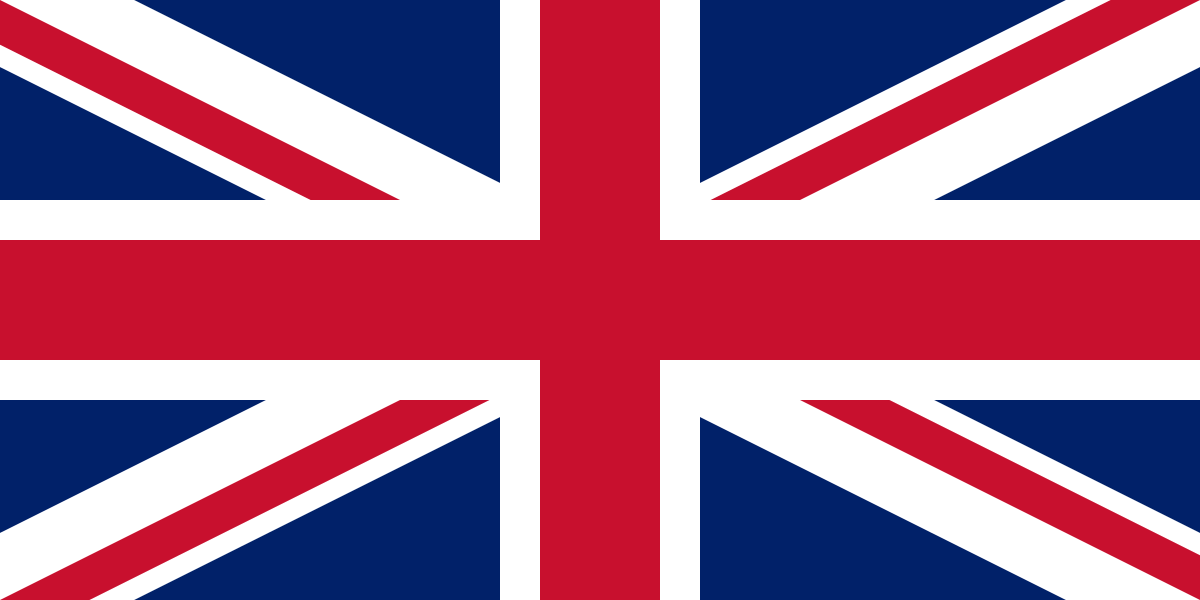

In [24]:
IPython.display.display(IPython.display.SVG(url=frag_url))